In [1]:
'''
This is an implementation of one factor Hull White interest rate 
model for Bermudan swaption
'''
import One_Factor_HW_Model
import numpy as np
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d.axes3d import Axes3D
import vol_surface_interpolation

In [2]:
'''
This is a zero curve in which the first column is term in years 
while the second column is rate
'''
zero_curve = np.array([
    [0.002740,  0.02049], 
    [0.090411,  0.020577],
    [0.169863,  0.021461],
    [0.246575,  0.021145],
    [0.495890,  0.021391],
    [0.745205,  0.021021],
    [0.991781,  0.022821],
    [1.241096,  0.025277],
    [1.493151,  0.027996],
    [1.742466,  0.030679],
    [2.000000,  0.033419],
    [3.005479,  0.040562],
    [4.002740,  0.045492],
    [5.002740,  0.049082],
    [6.002740,  0.051617],
    [7.005479,  0.053666],
    [8.010959,  0.055196],
    [9.008219,  0.056682],
    [10.005479, 0.057914],
    [12.008219, 0.059638],
    [15.010959, 0.061382],
    [20.016438, 0.062535],
    [30.019178, 0.061036]], 
dtype = np.float)

<IPython.core.display.Javascript object>


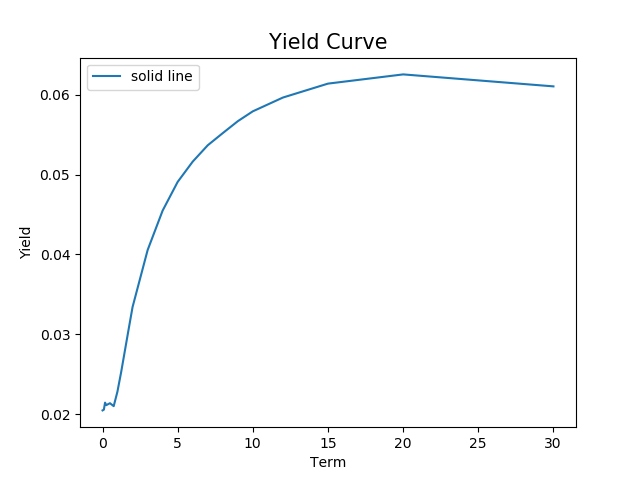

In [3]:
x = np.arange(zero_curve.shape[0]).astype(float)
y = np.arange(zero_curve.shape[0]).astype(float)
for i in range(zero_curve.shape[0]):
    x[i] = zero_curve[i][0]
    y[i] = zero_curve[i][1]
fig, ax = plt.subplots()
ax.plot(x, y, label='solid line')
ax.set_xlabel(r'Term', fontsize=10)
ax.set_ylabel(r'Yield', fontsize=10)
ax.set_title('Yield Curve', fontsize = 15)
ax.legend(loc=0)

In [4]:
'''
This is a sawption volatility surface. The first column represents swaption 
expiration term in yearswhile the first row represents an underlying swap term 
starting from corresponding swaption expiration date from the first column. For 
a given swaption expiration term (row number) and a underlying swap term 
(column number), the corresponding number on the table is the oprion volatility-
Black implied volatility in percentage. 
'''
volatility_surface = np.array([
   [0.000,   1.000,   2.000,   3.000,   4.000,   5.000,   7.000,   10.000,  15.000,  20.000,  30.000],
   [0.125,   50.000,  37.000,  33.500,  28.000,  26.000,  20.000,  19.000,  15.875,  12.750,  14.500],
   [0.250,   44.000,  37.000,  29.000,  26.750,  24.750,  19.500,  18.500,  15.875,  13.250,  13.000],
   [0.500,   37.500,  29.000,  26.250,  23.500,  21.500,  18.500,  18.000,  15.500,  13.000,  12.000],
   [1.000,   27.500,  24.500,  23.000,  21.000,  19.000,  17.500,  16.750,  14.500,  12.250,  11.000],
   [1.500,   23.500,  22.500,  20.500,  18.750,  16.500,  14.250,  13.750,  12.375,  11.000,  10.000],
   [2.000,   21.500,  20.500,  18.500,  16.500,  14.250,  12.250,  11.750,  11.375,  11.000,  9.000],
   [3.000,   19.000,  18.500,  16.250,  14.000,  12.250,  11.750,  11.250,  11.125,  11.000,  9.000],
   [4.000,   17.500,  16.000,  14.000,  12.500,  11.750,  11.250,  10.750,  10.375,  10.000,  9.000],
   [5.000,   15.500,  14.000,  12.500,  12.000,  11.250,  10.750,  9.750,   9.375,   9.000,   8.500],
   [7.000,   13.000,  12.000,  11.000,  10.500,  10.250,  10.000,  9.500,   9.125,   8.750,   8.500],
   [10.000,  11.500,  10.750,  10.500,  10.250,  10.000,  9.500,   9.000,   8.500,   8.000,   7.500]], 
dtype = np.float) 

<IPython.core.display.Javascript object>


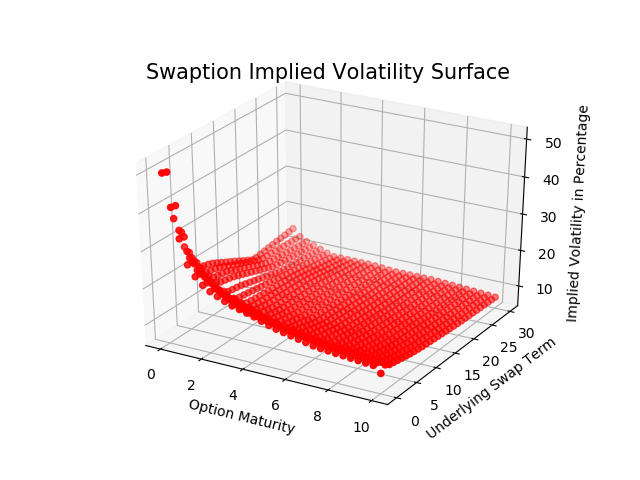

In [5]:
grids = 30
x = np.linspace(0.0, 10.0, grids)
y = np.linspace(0.0, 30.0, grids)
Z = np.arange(grids*grids).astype(float)
X = np.arange(grids*grids).astype(float) 
Y = np.arange(grids*grids).astype(float) 
for i in range(grids):
    for j in range(grids): 
        n = i*grids
        X[n+j] = x[i]
        Y[n+j] = y[j] 
        Z[n+j] = vol_surface_interpolation.func(volatility_surface, x[i],y[j]) 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='r', marker='o')
ax.set_xlabel('Option Maturity')
ax.set_ylabel('Underlying Swap Term')
ax.set_zlabel('Implied Volatility in Percentage');
ax.set_title('Swaption Implied Volatility Surface', fontsize = 15)
plt.show()

In [6]:
'''
This is a part of swaption deal information. The first column represents 
swaption excersie dates in years and all underlying swap maturity is the 
last term of the first column, i.e., 20.013699. The second column respresents 
strikes while the third column is indicator of excerise type. Here we use 2 to 
indicate Bermudan swaption and 1 for American swaption
'''
swaption_input = np.array([ 
   [0.000000,    0.06000,   0],
   [1.000000,    0.06000,   2],
   [2.000000,    0.06000,   2],
   [3.000000,    0.06000,   2],
   [4.002740,    0.06000,   2],
   [5.002740,    0.06000,   2],
   [6.002740,    0.06000,   2],
   [7.002740,    0.06000,   2],
   [8.005480,    0.06000,   2],
   [9.005480,    0.06000,   2],
   [10.005500,   0.06000,   2],
   [11.005500,   0.06000,   2],
   [12.008200,   0.06000,   2],
   [13.008200,   0.06000,   2],
   [14.008200,   0.06000,   2],
   [15.008200,   0.06000,   2],
   [16.011000,   0.06000,   2],
   [17.011000,   0.06000,   2],
   [18.011000,   0.06000,   2],
   [19.011000,   0.06000,   2],
   [20.013699,   0.06000,   0]],
dtype = np.float) 

<IPython.core.display.Javascript object>


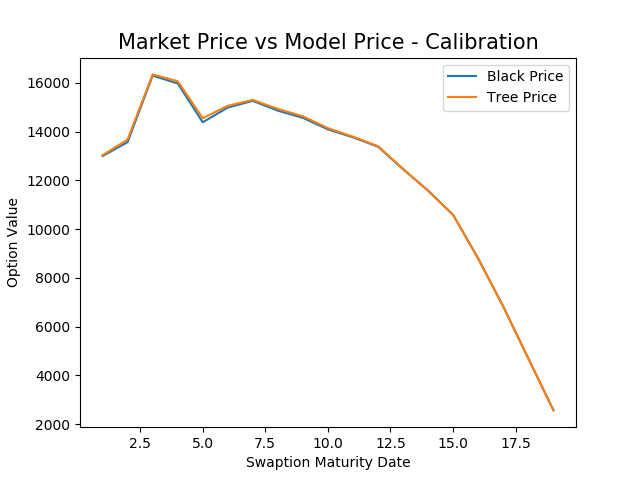


             Bermuran Swaption Price =  30909.035885926925


In [7]:
dim =swaption_input.shape[0]
Black_Price = np.arange(dim).astype(float) 
Tree_Price = np.arange(dim).astype(float)
mean_reversion = 0.025 
option_type = 0 
'''
1 means the option has a right-to-recieve (RTR) fixed rate while 0 indicates a 
right-to-pay (RTP) 
'''
number_of_tree_steps = 600  
'''
this is a number of steps on trinomial tree for HW model implementation 
'''
deal_notional = 1000000.0 
# call pricing model implemented in C++
price = One_Factor_HW_Model.Bermudan_Swaption(swaption_input, deal_notional, 
        zero_curve, volatility_surface, Black_Price, Tree_Price, mean_reversion, 
        option_type, number_of_tree_steps)
# plot the model calibration results
x = np.arange(swaption_input.shape[0]-2).astype(float) 
y = np.arange(swaption_input.shape[0]-2).astype(float)
y1 = np.arange(swaption_input.shape[0]-2).astype(float)
for i in range(swaption_input.shape[0]-2): 
    x[i] = swaption_input[i+1][0]
    y[i] = Black_Price[i+1] 
    y1[i] = Tree_Price[i+1]
fig, ax = plt.subplots()
ax.plot(x, y, label=r"Black Price")
ax.plot(x, y1, label=r"Tree Price")
ax.set_xlabel(r'Swaption Maturity Date', fontsize=10)
ax.set_ylabel(r'Option Value', fontsize=10)
ax.set_title('Market Price vs Model Price - Calibration', fontsize = 15)
ax.legend(loc=1)
print("\n             Bermuran Swaption Price = ", price)